<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>IMPORT NEEDED LIBRARIES</b>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
                font-weight:400"><b>LOAD THE DATASET</b>
</div>

In [2]:
df = pd.read_excel('https://query.data.world/s/uhu2eebycbrrewyxffus4wpjcbb7ap?dws=00000')

In [3]:
styled_df = df.style.set_table_styles([{'selector': 'th', 'props': [('background', 'lightgrey')]}])
styled_df

,Category,Quality,Country,Year,Cases
0,Irish Whiskey,Standard,United States,1990,243000.000000
1,Irish Whiskey,Standard,United States,1991,214000.000000
2,Irish Whiskey,Standard,United States,1992,219500.000000
3,Irish Whiskey,Standard,United States,1993,225000.000000
4,Irish Whiskey,Standard,United States,1994,239500.000000
5,Irish Whiskey,Standard,United States,1995,249000.000000
6,Irish Whiskey,Standard,United States,1996,259000.000000
7,Irish Whiskey,Standard,United States,1997,279500.000000
8,Irish Whiskey,Standard,United States,1998,296750.000000
9,Irish Whiskey,Standard,United States,1999,322000.000000


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>SHOW A SAMPLE</b>
</div>

In [4]:
df.sample(5)

,Category,Quality,Country,Year,Cases
1680,Irish Whiskey,Premium,Bulgaria,1996,NaN
652,Irish Whiskey,Standard,Spain,1994,8750.0
29,Irish Whiskey,Standard,Ireland,1992,513000.0
2223,Irish Whiskey,Premium,DF Rest of Africa,1999,NaN
385,Irish Whiskey,Standard,Slovakia,1997,1750.0


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>CHECK DATA TYPES OF THE DATASET</b>
</div>

In [5]:
df.dtypes

Category     object
Quality      object
Country      object
Year          int64
Cases       float64
dtype: object

<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>DATASET SUMMARY</b>
</div>

In [6]:
def summary(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum()
    summary_df['missing%'] = (df.isna().sum())/len(df)
    summary_df['unique'] = df.nunique().values
    summary_df['count'] = df.count().values
    return summary_df

summary(df).style.background_gradient(cmap='Blues')

,dtypes,missing#,missing%,unique,count
Category,object,0,0.000000,1,4131
Quality,object,0,0.000000,3,4131
Country,object,0,0.000000,76,4131
Year,int64,0,0.000000,27,4131
Cases,float64,1337,0.323650,1080,2794


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>CHECK FOR NULLS & MISSING VALUES</b>
</div>

In [7]:
df.isnull()

,Category,Quality,Country,Year,Cases
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4126,False,False,False,False,True
4127,False,False,False,False,True
4128,False,False,False,False,True
4129,False,False,False,False,True


In [8]:
null_counts = df.isnull().sum()
null_percentages = (df.isnull().sum() / len(df)) * 100

In [9]:
null_summary = pd.DataFrame({'Null Count': null_counts, 'Null Percentage': null_percentages})
display(null_summary)

,Null Count,Null Percentage
Category,0,0.000000
Quality,0,0.000000
Country,0,0.000000
Year,0,0.000000
Cases,1337,32.365045


In [10]:
styled_null_summary = null_summary.style.background_gradient(cmap='Reds', subset=['Null Percentage'])
styled_null_summary

,Null Count,Null Percentage
Category,0,0.000000
Quality,0,0.000000
Country,0,0.000000
Year,0,0.000000
Cases,1337,32.365045


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>High Precentage... Drop the nulls</b>
</div>

In [11]:
df = df.dropna(subset=['Cases'])

<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>CHECK AGAIN ....</b>
</div>

In [12]:
new_count = df.isnull().sum()
new_percentage = (df.isnull().sum() / len(df)) * 100

In [13]:
clean_summary = pd.DataFrame({'Null Count': new_count, 'Null Percentage': new_percentage})
display(clean_summary)

,Null Count,Null Percentage
Category,0,0.0
Quality,0,0.0
Country,0,0.0
Year,0,0.0
Cases,0,0.0


In [14]:
styled_clean_summary = clean_summary.style.background_gradient(cmap='Blues', subset=['Null Percentage'])
styled_clean_summary

,Null Count,Null Percentage
Category,0,0.000000
Quality,0,0.000000
Country,0,0.000000
Year,0,0.000000
Cases,0,0.000000


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>DATASET STRUCTURE</b>
</div>

In [15]:
print(f'Records: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Records: 2794
Columns: 5


In [16]:
column_names = df.keys().values.tolist()
column_names

['Category', 'Quality', 'Country', 'Year', 'Cases']

<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>DATASET GENERAL INFORMATION</b>
</div>

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2794 entries, 0 to 4111
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  2794 non-null   object 
 1   Quality   2794 non-null   object 
 2   Country   2794 non-null   object 
 3   Year      2794 non-null   int64  
 4   Cases     2794 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 131.0+ KB


In [18]:
structure_summary = pd.DataFrame({'Column Name': df.columns, 
                                  'Data Type': df.dtypes, 
                                  'Non-Null Count': df.count(), 
                                  'Missing Values': df.isnull().sum()})

# Create a Styler object to apply formatting
styled_summary = structure_summary.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})


In [19]:
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [20]:
display(styled_summary)

,Column Name,Data Type,Non-Null Count,Missing Values
Category,Category,object,2794,0
Quality,Quality,object,2794,0
Country,Country,object,2794,0
Year,Year,int64,2794,0
Cases,Cases,float64,2794,0


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>DATASET STATISTICAL SUMMARY</b>
</div>

In [21]:
# Generate summary statistics using describe()
summary_stats = df.describe()

# Create a Styler object to apply formatting
styled_summary = summary_stats.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

In [22]:
# Apply additional CSS styling to the Styler object
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid')]}
])

In [23]:
# Display the styled summary statistics
styled_summary

,Year,Cases
count,2794.000000,2794.000000
mean,2004.540086,35095.134216
std,7.444364,142176.633857
min,1990.000000,0.000000
25%,1999.000000,550.000000
50%,2005.000000,3750.000000
75%,2011.000000,20500.000000
max,2016.000000,3337500.000000


In [24]:
# Create a Styler object to apply formatting
summary_stats = df.describe().transpose()

# Create a Styler object to apply formatting
styled_summary = summary_stats.style.set_properties(**{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'})

# Apply additional CSS styling to the Styler object
styled_summary = styled_summary.set_table_styles([
    {'selector': 'thead', 'props': [('background-color', '#f2f2f2'), ('border-color', 'black'), ('border-style', 'solid')]},
    {'selector': 'th', 'props': [('border-color', 'black'), ('border-style', 'solid'),
                                  ('background-color', '#8bb8f2'), ('color', '#ffffff')]},
    {'selector': 'td', 'props': [('border-color', 'black'), ('border-style', 'solid'),
                                  ('background-color', '#ffffff'), ('color', '#555555')]}
])

# Display the styled summary statistics table
styled_summary

,count,mean,std,min,25%,50%,75%,max
Year,2794.000000,2004.540086,7.444364,1990.000000,1999.000000,2005.000000,2011.000000,2016.000000
Cases,2794.000000,35095.134216,142176.633857,0.000000,550.000000,3750.000000,20500.000000,3337500.000000


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>DATA ANALYSIS...</b>
</div>

<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>THE MAIN CATEGORY IN THE DATA</b>
</div>

In [25]:
df['Category'].value_counts()

Category
Irish Whiskey    2794
Name: count, dtype: int64

In [26]:
# Aggregate the counts and create a DataFrame
value_counts_table = df['Category'].value_counts().reset_index()
value_counts_table.columns = ['Category', 'Count']

# Apply the styling as before
styled_table = value_counts_table.style.set_properties(
    **{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'}) \
    .set_table_styles(
    [{'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
     {'selector': 'th', 'props': [('background-color', '#8bb8f2'), ('color', '#000000'), ('border-color', 'black'), ('border-style', 'solid')]},
     {'selector': 'td', 'props': [                     ('background-color', '#e8f0fe'), ('border-color', 'black'),
                     ('border-style', 'solid'), ('text-align', 'center'), ('border-style', 'solid'),
                     ('border-width', '1px'), ('padding', '6px')]}
    ])

# Display the styled table
styled_table

,Category,Count
0,Irish Whiskey,2794


<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>QUALITY</b>
</div>

In [27]:
df['Quality'].value_counts()

Quality
Standard         1263
Premium          1090
Super Premium     441
Name: count, dtype: int64

In [28]:
# Aggregate the counts and create a DataFrame
value_counts_table = df['Quality'].value_counts().reset_index()
value_counts_table.columns = ['Quality', 'Count']

# Apply the styling as before
styled_table = value_counts_table.style.set_properties(
    **{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'}) \
    .set_table_styles(
    [{'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
     {'selector': 'th', 'props': [('background-color', '#8bb8f2'), ('color', '#000000'), ('border-color', 'black'), ('border-style', 'solid')]},
     {'selector': 'td', 'props': [                     ('background-color', '#e8f0fe'), ('border-color', 'black'),
                     ('border-style', 'solid'), ('text-align', 'center'), ('border-style', 'solid'),
                     ('border-width', '1px'), ('padding', '6px')]}
    ])

# Display the styled table
styled_table

,Quality,Count
0,Standard,1263
1,Premium,1090
2,Super Premium,441


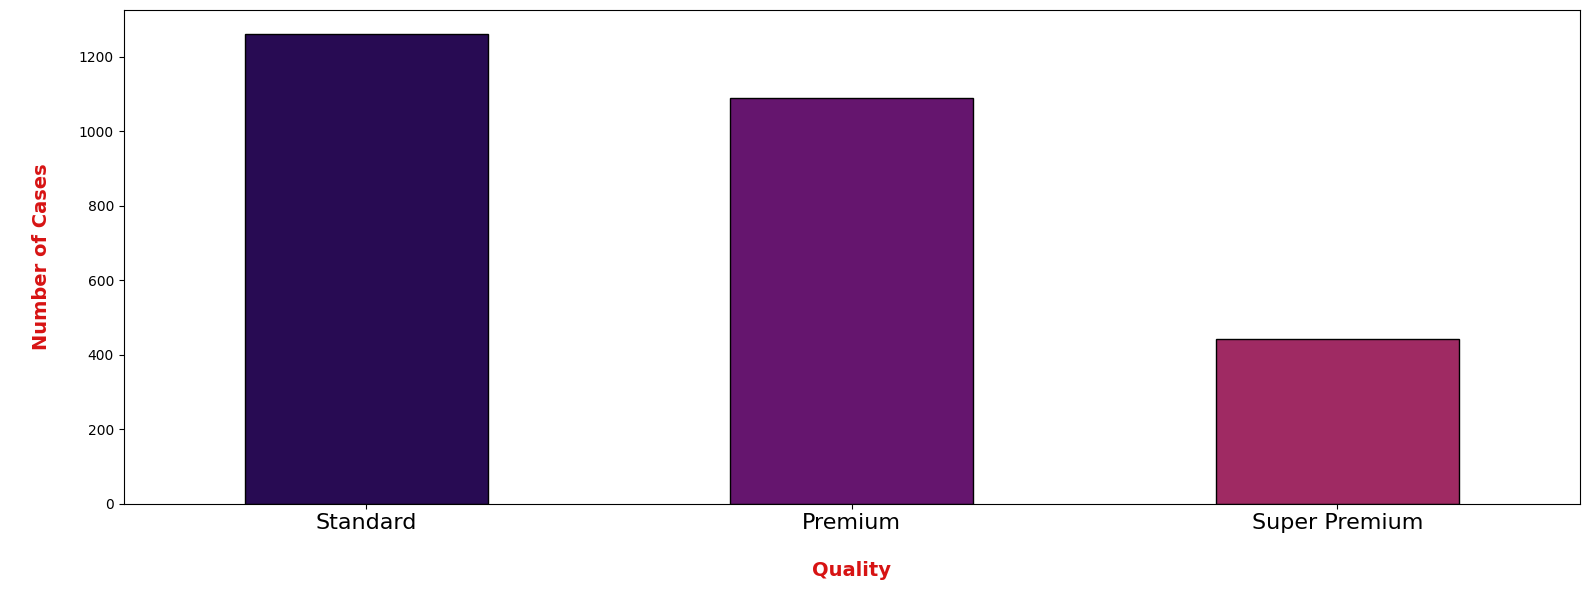

In [29]:
plt.figure(figsize = (16, 6))

df["Quality"].value_counts().sort_values(ascending = False).plot(kind = 'bar', color = sns.color_palette('inferno'), edgecolor = 'black')
plt.xlabel('Quality', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nNumber of Cases', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)

plt.tight_layout()
plt.show()

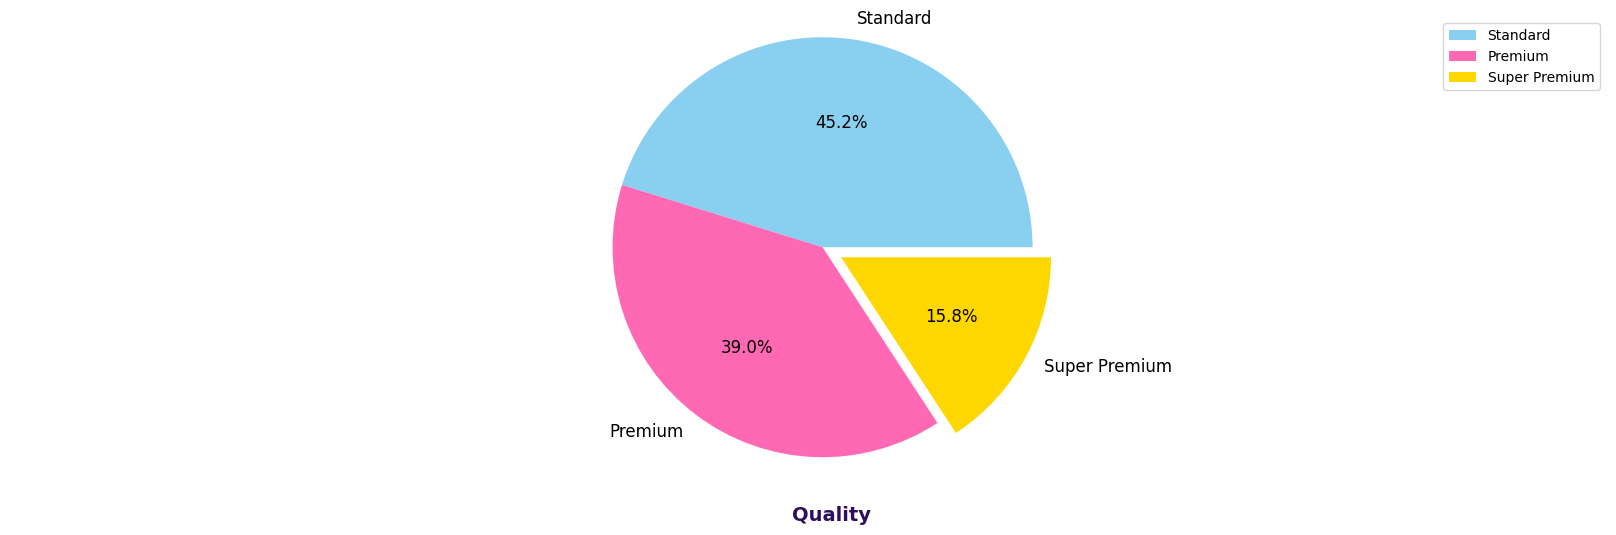

In [30]:
plt.figure(figsize = (20, 6))

counts = df["Quality"].value_counts()
explode = (0, 0.0,  0.1)

counts.plot(kind = 'pie', fontsize = 12, colors = colors, explode = explode, autopct = '%.1f%%')
plt.xlabel('Quality', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.ylabel(' ', weight = "bold", color = "#2F0F5D", fontsize = 14, labelpad = 20)
plt.axis('equal')
plt.legend(labels = counts.index, loc = "best")
plt.show()

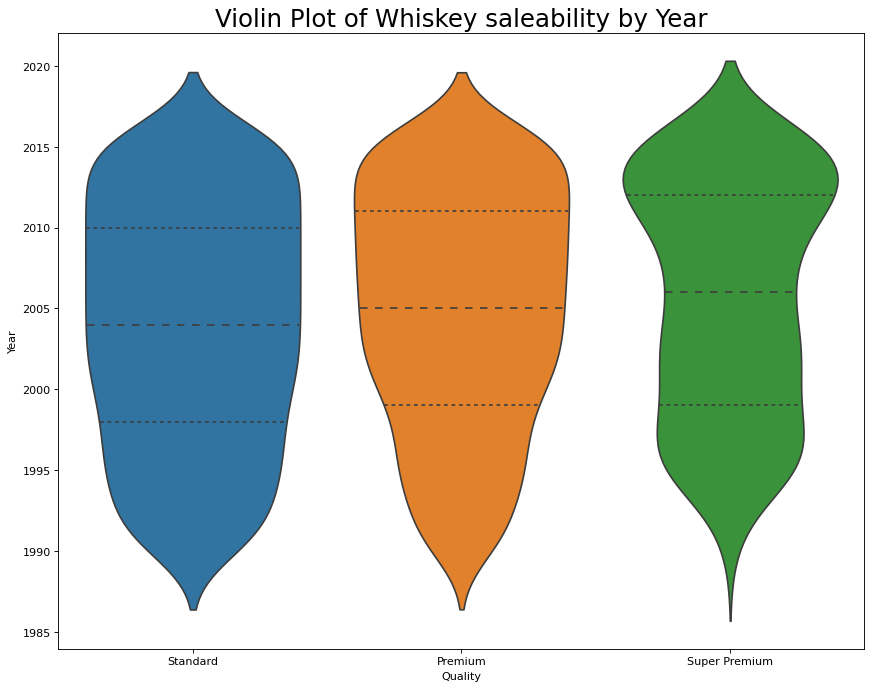

In [31]:
plt.figure(figsize=(13,10), dpi= 80)
sns.violinplot(x='Quality', y='Year', data=df, scale='width', inner='quartile')

# Decoration
plt.title('Violin Plot of Whiskey saleability by Year', fontsize=22)
plt.show()

In [32]:
from matplotlib.animation import FuncAnimation
from wordcloud import WordCloud
import random

In [33]:
new_counts = {
    'Standard': random.randint(500, 1500),
    'Premium': random.randint(800, 1200),
    'Super Premium': random.randint(200, 600)
}

In [34]:
quality_counts = df['Quality'].value_counts()

def update_word_cloud(frame):
    # Update the counts for each quality level
    new_counts['Standard'] += random.randint(-100, 100)
    new_counts['Premium'] += random.randint(-100, 100)
    new_counts['Super Premium'] += random.randint(-100, 100)


In [35]:
plt.clf()

<Figure size 640x480 with 0 Axes>

In [36]:
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='viridis')
wordcloud.generate_from_frequencies(new_counts)

Text(0.5, 1.0, 'Quality Distribution')

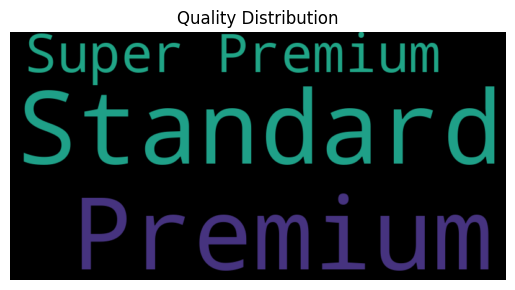

In [37]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Quality Distribution')

<div style="padding:10px;
            color:#a9aba9;
            margin:50px;
            font-size:130%;
            display:fill;
            border-radius:25px;
            border-style: solid;
            border-color: #141E46;
            background-color:#141E46;
            overflow:hidden;
            font-weight:400"><b>COUNTRY</b>
</div>

In [38]:
df['Country'].value_counts()

Country
United States                            81
DF British Isles (Inc. Ireland)          79
Germany                                  78
Ireland                                  76
DF Nordic Countries - (All Countries)    74
                                         ..
DF Rest of Australasia                    3
Mexico                                    3
DF Poland                                 2
DF Indonesia                              2
DF Indian Sub-Continent                   1
Name: count, Length: 76, dtype: int64

In [39]:
df['Country'].unique().__len__()

76

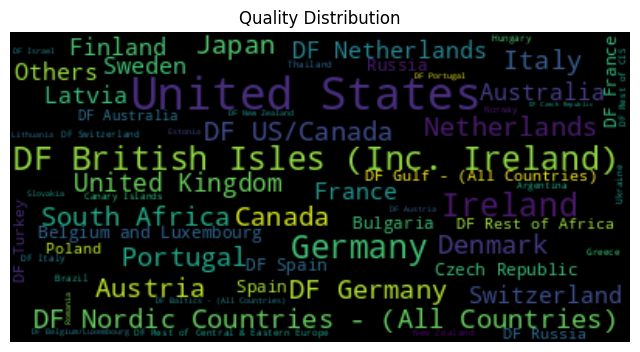

In [40]:
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(background_color='black', colormap='viridis')

quality_counts = df['Country'].value_counts()

# Generate word cloud
wordcloud.generate_from_frequencies(quality_counts)

# Plot the word cloud
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Quality Distribution')
plt.show()

In [41]:
country_percentage = df['Country'].value_counts(normalize=True) * 100
print(country_percentage)

Country
United States                            2.899069
DF British Isles (Inc. Ireland)          2.827487
Germany                                  2.791696
Ireland                                  2.720115
DF Nordic Countries - (All Countries)    2.648533
                                           ...   
DF Rest of Australasia                   0.107373
Mexico                                   0.107373
DF Poland                                0.071582
DF Indonesia                             0.071582
DF Indian Sub-Continent                  0.035791
Name: proportion, Length: 76, dtype: float64


In [42]:
# Aggregate the counts and create a DataFrame
value_counts_table = df['Country'].value_counts().reset_index()
value_counts_table.columns = ['Country', 'Count']

# Apply the styling as before
styled_table = value_counts_table.style.set_properties(
    **{'text-align': 'center', 'border-color': 'black', 'border-style': 'solid'}) \
    .set_table_styles(
    [{'selector': 'thead', 'props': [('background-color', '#f7f7f7'), ('border-color', 'black'), ('border-style', 'solid')]},
     {'selector': 'th', 'props': [('background-color', '#8bb8f2'), ('color', '#000000'), ('border-color', 'black'), ('border-style', 'solid')]},
     {'selector': 'td', 'props': [                     ('background-color', '#e8f0fe'), ('border-color', 'black'),
                     ('border-style', 'solid'), ('text-align', 'center'), ('border-style', 'solid'),
                     ('border-width', '1px'), ('padding', '6px')]}
    ])

# Display the styled table
styled_table

,Country,Count
0,United States,81
1,DF British Isles (Inc. Ireland),79
2,Germany,78
3,Ireland,76
4,DF Nordic Countries - (All Countries),74
5,DF US/Canada,74
6,Austria,70
7,Japan,67
8,South Africa,66
9,Italy,65


In [43]:
# Summary statistics for relevant numerical columns grouped by country
summary_stats = df.groupby('Country')['Cases'].describe()

In [44]:
summary_stats

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Argentina,30.0,3838.333333,5274.379900,0.0,200.0,1750.0,3500.0,19050.0
Australia,54.0,28398.148148,33616.047890,0.0,2812.5,7875.0,53750.0,114000.0
Austria,70.0,4002.000000,5360.483863,0.0,405.0,1340.0,4787.5,21200.0
Belgium and Luxembourg,54.0,8916.666667,9217.630768,0.0,1312.5,4750.0,20950.0,24750.0
Brazil,27.0,3992.592593,4201.252188,0.0,375.0,3250.0,7025.0,14000.0
...,...,...,...,...,...,...,...,...
Switzerland,55.0,3659.090909,3942.222664,0.0,250.0,1300.0,7025.0,14600.0
Thailand,27.0,3538.888889,2526.525942,500.0,1125.0,3750.0,4500.0,11500.0
Ukraine,31.0,13069.354839,19182.625287,0.0,375.0,3050.0,18150.0,56700.0


In [45]:
# Apply formatting to the summary statistics table
styled_summary_stats = summary_stats.style.set_properties(**{'text-align': 'center'}) \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#8bb8f2'), ('color', 'black')]}])

# Display the formatted table
styled_summary_stats


,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Argentina,30.000000,3838.333333,5274.379900,0.000000,200.000000,1750.000000,3500.000000,19050.000000
Australia,54.000000,28398.148148,33616.047890,0.000000,2812.500000,7875.000000,53750.000000,114000.000000
Austria,70.000000,4002.000000,5360.483863,0.000000,405.000000,1340.000000,4787.500000,21200.000000
Belgium and Luxembourg,54.000000,8916.666667,9217.630768,0.000000,1312.500000,4750.000000,20950.000000,24750.000000
Brazil,27.000000,3992.592593,4201.252188,0.000000,375.000000,3250.000000,7025.000000,14000.000000
Bulgaria,51.000000,34329.607843,54908.322829,0.000000,250.000000,5300.000000,45675.000000,169200.000000
Canada,64.000000,25519.531250,38899.500769,250.000000,2437.500000,10525.000000,26187.500000,182000.000000
Canary Islands,27.000000,6611.111111,4322.066220,1500.000000,1875.000000,7150.000000,9650.000000,14250.000000
Czech Republic,43.000000,43820.930233,60437.331171,0.000000,1050.000000,9000.000000,70315.000000,197500.000000


In [46]:
fig = px.choropleth(df, locations="Country", locationmode="country names", color="Cases",
                    color_continuous_scale=px.colors.sequential.Plasma)
fig.show()